## Задание

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .
3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.
4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек. 
5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10*i-й до (i+1)*10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)

6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

In [369]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
import os

## Потребление энергии

Временной ряд связан с измерением потребления энергии в отдельных регионах США в период 2002 по 2018 г. (PJM Hourly Energy Consumption Data
https://www.kaggle.com/robikscube/hourly-energy-consumption). Содержит часовые измерения и после обработки добавлены метки по времени для календаря.

In [370]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])



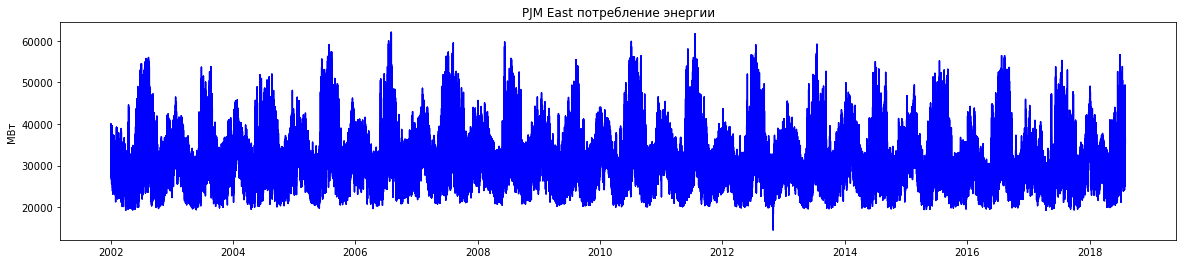

In [371]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [372]:
data_w = data.copy().resample('W').mean()
data_w.head(15)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.580420,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.500000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.500000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.500000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.500000,0.000000,0.000000,0.000000
2002-02-10,31150.517857,2002.0,2.000000,7.000000,1.0,38.000000,6.0,3.000000,11.500000,0.000000,0.000000,0.000000
2002-02-17,30616.565476,2002.0,2.000000,14.000000,1.0,45.000000,7.0,3.000000,11.500000,0.000000,0.142857,0.000000
2002-02-24,29144.130952,2002.0,2.000000,21.000000,1.0,52.000000,8.0,3.000000,11.500000,0.142857,0.000000,0.142857
2002-03-03,29869.011905,2002.0,2.428571,16.000000,1.0,59.000000,9.0,3.000000,11.500000,0.000000,0.000000,0.000000


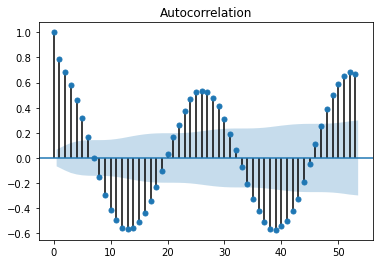

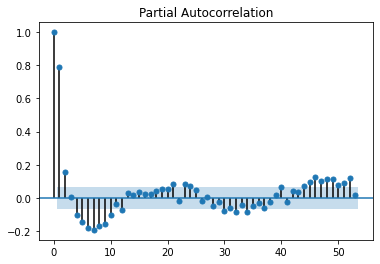

In [373]:
# посмотрим автокорреляцию и частичную корреляцию
sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=53)
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=53)
plt.show()



In [374]:
data_w.drop('hour', axis=1,inplace=True)
data_w.drop('dayofweek', axis=1,inplace=True)
data_w.drop('is_holiday', axis=1,inplace=True)
data_w.drop('is_prev_holiday', axis=1,inplace=True)
data_w.drop('is_next_holiday', axis=1,inplace=True)
data_w.drop('dayofmonth', axis=1,inplace=True)
data_w.drop('dayofyear', axis=1,inplace=True)

#Поскольку в годовом развороте ряда тренда нет (временные ряды 2 и 3), 
#то и признак 'year' можно исключить.
#data_w.drop('year', axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,quarter,weekofyear
Date,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0


Добавим новых признаков, описывающих содержание ряда. К таким признакам можно отнести разности ряда и разнообразные варианты сглаживания. Добавим к нашей модели 1-е разности. При этом следует помнить, что такие операции уменьшают общую длину корректной выборки на 1, т.е. первую строку данных следует исключить из модели в момент обучения.
можно добавить все, что можем придумать. Например, логарифм признака, частные признаков , частные логарифмов и т.д

In [375]:
# Первые разности
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

In [376]:
first_diff_w =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_w).astype('float32')

In [377]:
first_diff_l =np.log(data_w.iloc[1:,0].values) 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l

In [378]:
#Добавим скользящее среднее по всей модели с глубиной 4 и 13 недели. 
data_w['d_w4']=data_w['PJME_MW'].rolling(window=4).mean()
data_w['d_w13']=data_w['PJME_MW'].rolling(window=13).mean()

In [379]:
#А теперь добавим еще и экспоненциальную среднюю. 
#Медленную, т.к. интересная информация лежит на уровне сезонных колебаний цены.
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)
data_w['exp_0_08'] = exponential_smoothing(data_w['PJME_MW'], 0.08)

In [380]:
data_w

,PJME_MW,year,month,quarter,weekofyear,diff1,diff1_d,diff1_l,d_w4,d_w13,exp_0_01,exp_0_03,exp_0_05,exp_0_08
Date,,,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,NaN,NaN,32392.160839,32392.160839,32392.160839,32392.160839
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,-904.773926,-0.028734,10.357342,NaN,NaN,32383.113100,32365.017621,32346.922142,32319.778924
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,-34.505951,-0.001097,10.356246,NaN,NaN,32373.810778,32337.653521,32302.220083,32250.427087
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,-1311.351196,-0.043506,10.313659,31368.489615,NaN,32351.487968,32271.769808,32194.185567,32081.715301
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,-945.041687,-0.032368,10.281804,30569.571429,NaN,32319.937969,32179.511357,32044.300693,31850.897124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-08,38459.982143,2018.0,7.000000,3.0,27.0,2548.142822,0.066254,10.557374,34850.102679,30230.806319,31149.351351,30974.370915,31029.513277,31223.895665
2018-07-15,36420.035714,2018.0,7.000000,3.0,28.0,-2039.946411,-0.056012,10.502874,36375.876488,30900.174451,31202.058195,31137.740859,31299.039399,31639.586869
2018-07-22,35612.095238,2018.0,7.000000,3.0,29.0,-807.940491,-0.022687,10.480441,36600.988095,31504.146520,31246.158565,31271.971490,31514.692191,31957.387539


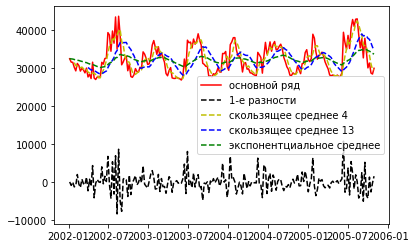

In [381]:
N100=200
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['d_w4'][:N100],'--y',label ='скользящее среднее 4')
plt.plot(data_w.index[:N100],data_w['d_w13'][:N100],'--b',label ='скользящее среднее 13')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()

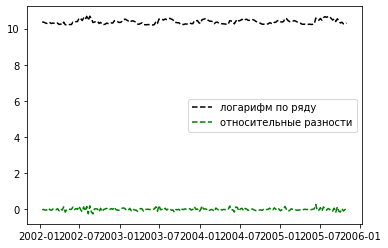

In [382]:
N100=200
plt.plot(data_w.index[1:N100],data_w['diff1_l'][1:N100],'--k',label ='логарифм по ряду')
plt.plot(data_w.index[1:N100],data_w['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

Для определения разумных интервалов имеет смысл вспомнить результаты анализа ряда в статистических моделях. Период сезонных колебаний 52 недельный цикл. Это позволит не строить все возможные сочетания параметров модели, а сократить их число до относительно небольшого подмножества. Посмотрим на примере экспоненциальных средних в диапазоне alpha = [0.3, 0.8] 

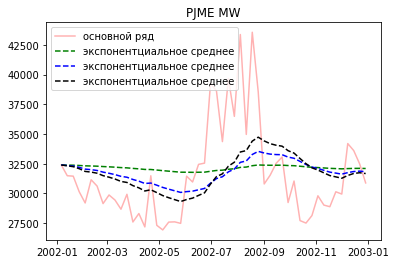

In [383]:

N100=52
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N100],data_w['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

Добавим истории длиной p в признаках автокорреляции, аналогично добавляем первые разности на глубину p, длиной до 13 недель - 1 квартала

In [384]:
p = 13
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]

#Удаляем первые p строк
data_w.drop(data_w.index[:p], inplace = True)

In [385]:
data_w

,PJME_MW,year,month,quarter,weekofyear,diff1,diff1_d,diff1_l,d_w4,d_w13,...,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-04-07,28308.778443,2002.0,4.000000,2.0,14.0,712.909424,0.025183,10.250927,28626.228837,29769.564459,...,-1311,-945,1954,-533,-1472,724,-428,-768,1254,-2331
2002-04-14,27182.482143,2002.0,4.000000,2.0,15.0,-1126.296265,-0.041435,10.210328,28253.654432,29438.417939,...,-945,1954,-533,-1472,724,-428,-768,1254,-2331,712
2002-04-21,31484.488095,2002.0,4.000000,2.0,16.0,4302.005859,0.136639,10.357250,28642.904432,29440.849258,...,1954,-533,-1472,724,-428,-768,1254,-2331,712,-1126
2002-04-28,27316.886905,2002.0,4.000000,2.0,17.0,-4167.601074,-0.152565,10.215260,28573.158896,29223.569038,...,-533,-1472,724,-428,-768,1254,-2331,712,-1126,4302
2002-05-05,26929.482143,2002.0,4.714286,2.0,18.0,-387.404755,-0.014386,10.200977,28228.334821,29049.183964,...,-1472,724,-428,-768,1254,-2331,712,-1126,4302,-4167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-08,38459.982143,2018.0,7.000000,3.0,27.0,2548.142822,0.066254,10.557374,34850.102679,30230.806319,...,-2200,2588,-1531,1238,2528,563,-2330,1701,4394,1200
2018-07-15,36420.035714,2018.0,7.000000,3.0,28.0,-2039.946411,-0.056012,10.502874,36375.876488,30900.174451,...,2588,-1531,1238,2528,563,-2330,1701,4394,1200,2548
2018-07-22,35612.095238,2018.0,7.000000,3.0,29.0,-807.940491,-0.022687,10.480441,36600.988095,31504.146520,...,-1531,1238,2528,563,-2330,1701,4394,1200,2548,-2039


## Выделение существенных признаков
Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 4, тогда target = y(t+h)=y(t+1) 

In [386]:
scl_target=StandardScaler() 
h=4
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape



(836, 1)

Входной набор признаков берем из нашей таблицы. Необходимо помнить, что у нас есть интегральные признаки (для календаря), которые связаны с базовыми признаками. Обычно такие признаки рассматривают отдельно. Однако для эксперимента оставим все признаки для процедуры селекции.


In [387]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(836, 40)

Есть признаки хорошие, а есть признаки плохие. Применим механизмы  селекции признаков для нашей модели. 
Рассмотрим механизмы селекции специфичные для регрессий и доступные из scikit-learn. Это два основных способа селекции: 
- построим или применим метрику взвешивающую связь признака и целевого свойства,
- проведем предварительное обучение и проверим влиятельность признаков по результатам такого обучения.

Такое решение задачи селекции признаков поддерживается через SelectKBest (отбираем k лучших признаков), SelectPercentile (отбираем заданный процент признаков) и SelectFromModel, соответственно(https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). Посмотрим на результаты оценки нашей системы признаков.

In [388]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

In [389]:
f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=0.52,  I=0
F-test=0.03,  I=1
F-test=0.01,  I=2
F-test=0.01,  I=3
F-test=0.01,  I=4
F-test=0.09,  I=5
F-test=0.09,  I=6
F-test=0.53,  I=7
F-test=0.15,  I=8
F-test=0.35,  I=9
F-test=0.00,  I=10
F-test=0.04,  I=11
F-test=0.07,  I=12
F-test=0.06,  I=13
F-test=0.27,  I=14
F-test=0.48,  I=15
F-test=0.72,  I=16
F-test=0.92,  I=17
F-test=1.00,  I=18
F-test=0.94,  I=19
F-test=0.66,  I=20
F-test=0.43,  I=21
F-test=0.20,  I=22
F-test=0.05,  I=23
F-test=0.00,  I=24
F-test=0.05,  I=25
F-test=0.23,  I=26
F-test=0.07,  I=27
F-test=0.04,  I=28
F-test=0.03,  I=29
F-test=0.01,  I=30
F-test=0.00,  I=31
F-test=0.00,  I=32
F-test=0.02,  I=33
F-test=0.03,  I=34
F-test=0.07,  I=35
F-test=0.10,  I=36
F-test=0.12,  I=37
F-test=0.14,  I=38
F-test=0.12,  I=39


Удивительно, что с первый признак дает низкую корреляцию. При h=1 такого не было.
Применим автоматизацию выбора через SelectKBest c выделением  лучших признаков.

In [390]:
sfk =SelectKBest(f_regression, k=7)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(836, 7)

In [391]:
column_names = data_w.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 'diff1_l', 't11', 't10', 't9', 't8', 't7'], dtype='object')

Лучшее множество признаков отделено в X_new1. Проверим результат оценки признаков по процентному отбору и сохраним его в X_new2.

In [392]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(836, 4)

In [393]:
column_namesp = data_w.columns[sfp.get_support()]
column_namesp

Index(['t11', 't10', 't9', 't8'], dtype='object')

Наконец, третий вариант - применим выделение признаков через построение модели. Помним, что модель должна уметь выбрать подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3

In [394]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(836, 5)

In [395]:
#Сравним результаты:
[X_new1[10:15,:], X_new2[10:15,:],X_new3[10:15,:]]

[array([[ 0.1016021 ,  0.16503612,  1.78591555,  1.62717207,  0.56086565,
          1.88841303,  1.09121479],
        [ 0.23518616,  0.29899111,  1.62799381,  0.56096144,  1.8885554 ,
          1.09119895,  2.81224845],
        [-0.72286611, -0.7138216 ,  0.56008247,  1.88828997,  1.09124171,
          2.81208175,  0.71156766],
        [-0.27061052, -0.22014744,  1.88952823,  1.0911932 ,  2.81233953,
          0.7115851 ,  2.86023544],
        [-1.10275169, -1.15270186,  1.09116001,  2.81182278,  0.71158043,
          2.86006454,  1.60457568]]),
 array([[1.78591555, 1.62717207, 0.56086565, 1.88841303],
        [1.62799381, 0.56096144, 1.8885554 , 1.09119895],
        [0.56008247, 1.88828997, 1.09124171, 2.81208175],
        [1.88952823, 1.0911932 , 2.81233953, 0.7115851 ],
        [1.09116001, 2.81182278, 0.71158043, 2.86006454]]),
 array([[0.73155815, 0.69104009, 1.62717207, 0.56086565, 1.88841303],
        [0.73155815, 0.75745875, 0.56096144, 1.8885554 , 1.09119895],
        [0.73155

In [396]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  7 16 17 18 19 20]
Номера признаков лучших признаков по процентной форме:  [16 17 18 19]
Номера признаков для выбора по модели :  [ 2  4 17 18 19]


In [397]:
list_par=[0, 2, 4, 7, 16,17,18, 19]
X_new = X[:,list_par]
data_w.columns[list_par]



Index(['PJME_MW', 'month', 'weekofyear', 'diff1_l', 't11', 't10', 't9', 't8'], dtype='object')

In [398]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 853 entries, 2002-04-07 to 2018-08-05
Freq: W-SUN
Data columns (total 40 columns):
PJME_MW       853 non-null float64
year          853 non-null float64
month         853 non-null float64
quarter       853 non-null float64
weekofyear    853 non-null float64
diff1         853 non-null float64
diff1_d       853 non-null float64
diff1_l       853 non-null float64
d_w4          853 non-null float64
d_w13         853 non-null float64
exp_0_01      853 non-null float64
exp_0_03      853 non-null float64
exp_0_05      853 non-null float64
exp_0_08      853 non-null float64
t13           853 non-null int64
t12           853 non-null int64
t11           853 non-null int64
t10           853 non-null int64
t9            853 non-null int64
t8            853 non-null int64
t7            853 non-null int64
t6            853 non-null int64
t5            853 non-null int64
t4            853 non-null int64
t3            853 non-null int64
t2         

In [399]:
TOP_FEATURES = ['PJME_MW', 'month', 'weekofyear', 'diff1_l', 't11', 't10', 't9', 't1']
data_w[TOP_FEATURES][13:]

,PJME_MW,month,weekofyear,diff1_l,t11,t10,t9,t1
Date,,,,,,,,
2002-07-07,38626.654762,7.000000,27.0,10.561698,31484,27316,26929,39257
2002-07-14,34359.119048,7.000000,28.0,10.444623,27316,26929,27587,38626
2002-07-21,39671.779762,7.000000,29.0,10.588395,26929,27587,27606,34359
2002-07-28,36481.577381,7.000000,30.0,10.504563,27587,27606,27480,39671
2002-08-04,43367.934524,7.571429,31.0,10.677476,27606,27480,31448,36481
...,...,...,...,...,...,...,...,...
2018-07-08,38459.982143,7.000000,27.0,10.557374,27760,25559,28147,35911
2018-07-15,36420.035714,7.000000,28.0,10.502874,25559,28147,26616,38459
2018-07-22,35612.095238,7.000000,29.0,10.480441,28147,26616,27854,36420


## Разделение данных на тестовые и тренировочные 

In [400]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

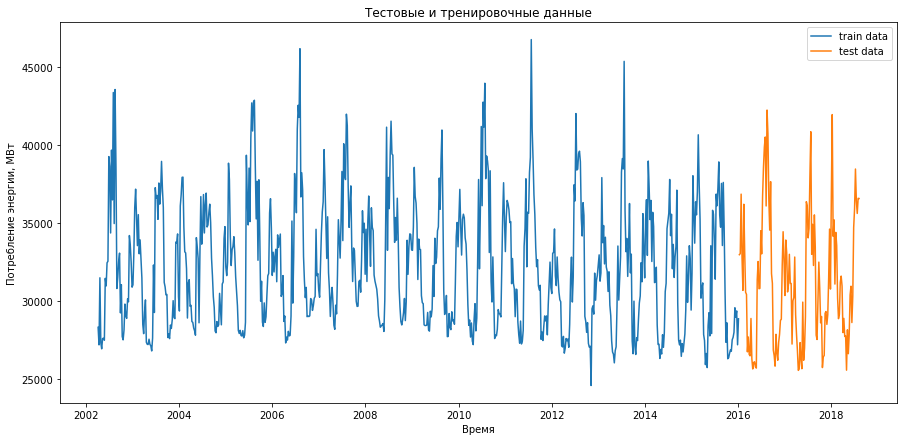

In [401]:
train, test = split_data(data_w, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [402]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2016-01-10 to 2018-08-05
Freq: W-SUN
Data columns (total 40 columns):
PJME_MW       135 non-null float64
year          135 non-null float64
month         135 non-null float64
quarter       135 non-null float64
weekofyear    135 non-null float64
diff1         135 non-null float64
diff1_d       135 non-null float64
diff1_l       135 non-null float64
d_w4          135 non-null float64
d_w13         135 non-null float64
exp_0_01      135 non-null float64
exp_0_03      135 non-null float64
exp_0_05      135 non-null float64
exp_0_08      135 non-null float64
t13           135 non-null int64
t12           135 non-null int64
t11           135 non-null int64
t10           135 non-null int64
t9            135 non-null int64
t8            135 non-null int64
t7            135 non-null int64
t6            135 non-null int64
t5            135 non-null int64
t4            135 non-null int64
t3            135 non-null int64
t2         

In [403]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

# Строим Модель
При решении задачи на начальном этапе, самый интересный результат был получен на модели GradientBoostingRegressor. Остановимся на построении именно такой формы предсказания. 

2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков.

In [404]:
model_ag = GradientBoostingRegressor(max_depth=6, random_state=0, n_estimators=300)

In [405]:
model_ag.fit(X_train, y_train)
y_test_pred = model_ag.predict(X_test)
y_pred = model_ag.predict(X_test)


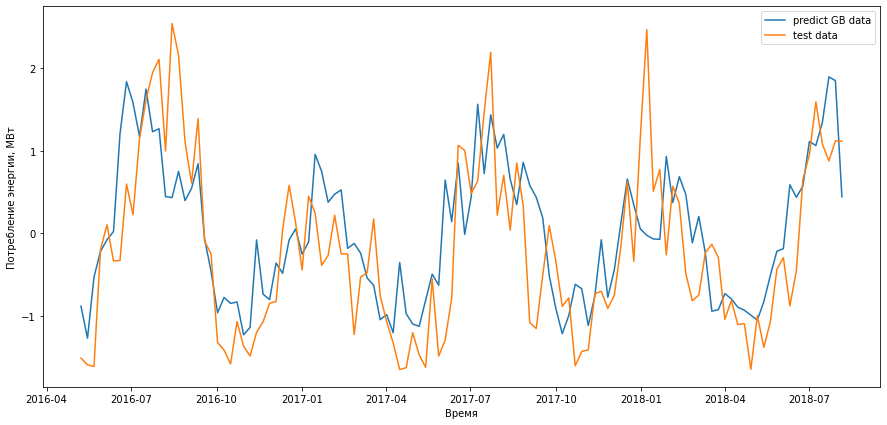

In [406]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_pred, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [407]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [408]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_pred) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_pred) 
er_r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)


ошибка mse :   0.5722043288303654 
ошибка mae  :   0.5903237351051916 
оценка R2 :   0.4628655106937687


Абсолютная процентная ошибка (MAPE). Определять MAPE для масштабированной переменной не верно. Поэтому переведем ответ решателя обратно в состояние без масштаба.

In [409]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [410]:
mape = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform(y_pred))
print('ошибка градиентного бустинга MAPE :  ', mape,'%')

ошибка градиентного бустинга MAPE :   7.556242060946534 %


3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

In [411]:
scl_target=StandardScaler() 
h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape


(839, 1)

In [412]:
scl_x=StandardScaler() 
X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(839, 40)

In [413]:
#Буду использовать тот же набор характеристик и модель

In [414]:
X_new_1 = X[:,list_par]

In [415]:
X_train = X_new_1[:train.shape[0],:]
y_train = y[:train.shape[0],0]
X_test = X_new_1[train.shape[0]:,:]
y_test = y[train.shape[0]:,0]


In [416]:
model_ag.fit(X_train, y_train)
y_test_pred = model_ag.predict(X_test)
y_pred = model_ag.predict(X_test)

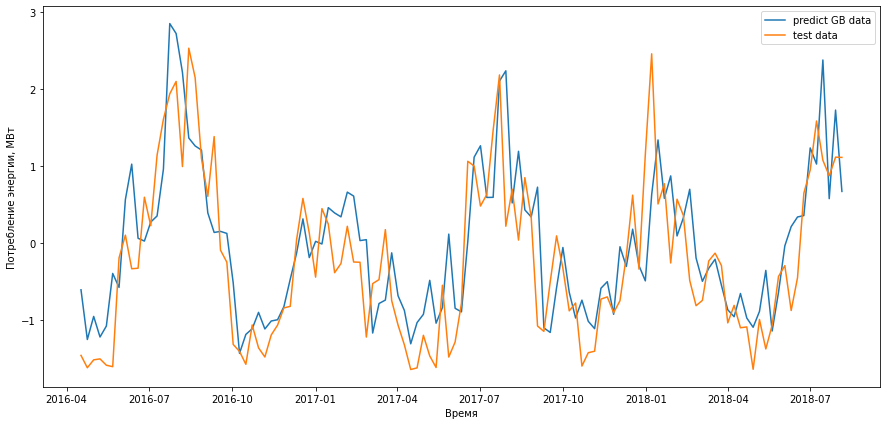

In [417]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_pred, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [418]:
mape = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform(y_pred))
print('ошибка градиентного бустинга MAPE :  ', mape,'%')

ошибка градиентного бустинга MAPE :   6.786211987352978 %


ошибка по сравнению с 4 ым шагом уменьшилась  на 0.8%



### 4. 
Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек

## Использование модели для предсказания n*h моментов времени
Мы построили короткий прогноз, но его можно продолжить на следующие точки ряда. Для этого будем использовать результаты прогноза для следующего шага.  Необходимо заменять X_test[t+i, 0] = y_test[t+i-1] и продолжить моделирование в новом состоянии. Сделаем прогноз на 4ую неделю.

In [419]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 853 entries, 2002-04-07 to 2018-08-05
Freq: W-SUN
Data columns (total 40 columns):
PJME_MW       853 non-null float64
year          853 non-null float64
month         853 non-null float64
quarter       853 non-null float64
weekofyear    853 non-null float64
diff1         853 non-null float64
diff1_d       853 non-null float64
diff1_l       853 non-null float64
d_w4          853 non-null float64
d_w13         853 non-null float64
exp_0_01      853 non-null float64
exp_0_03      853 non-null float64
exp_0_05      853 non-null float64
exp_0_08      853 non-null float64
t13           853 non-null int64
t12           853 non-null int64
t11           853 non-null int64
t10           853 non-null int64
t9            853 non-null int64
t8            853 non-null int64
t7            853 non-null int64
t6            853 non-null int64
t5            853 non-null int64
t4            853 non-null int64
t3            853 non-null int64
t2         

In [420]:
X_test_100

array([[-0.81624628, -0.74730018, -0.8386182 , -0.81906988,  1.18623302,
         0.16465456, -0.35620274,  1.02433307],
       [-1.4646102 , -0.74730018, -0.77208385, -1.59278098,  0.16368149,
        -0.35502618,  1.02455912,  0.24061759],
       [-1.62527313, -0.74730018, -0.70554951, -1.7963128 , -0.35634044,
         1.02471245,  0.24158593, -0.38725534],
       [-1.52253273, -0.70502476, -0.63901517, -1.66557931,  1.02430404,
         0.24231949, -0.38569231, -0.42302658],
       [-1.50999659, -0.45137224, -0.57248083, -1.64976887,  0.24139741,
        -0.3844939 , -0.42142968, -1.34332319],
       [-1.59219516, -0.45137224, -0.50594649, -1.75399496, -0.38582751,
        -0.42020479, -1.34085463, -1.1049316 ],
       [-1.61146298, -0.45137224, -0.43941214, -1.77861849, -0.42156183,
        -1.3389484 , -1.10268883, -1.38384726],
       [-0.19769346, -0.45137224, -0.3728778 , -0.14315457, -1.34090863,
        -1.10095909, -1.38134031, -1.40736123],
       [ 0.0974796 , -0.23999514

In [421]:
X[2,3]

0.44556137996934114

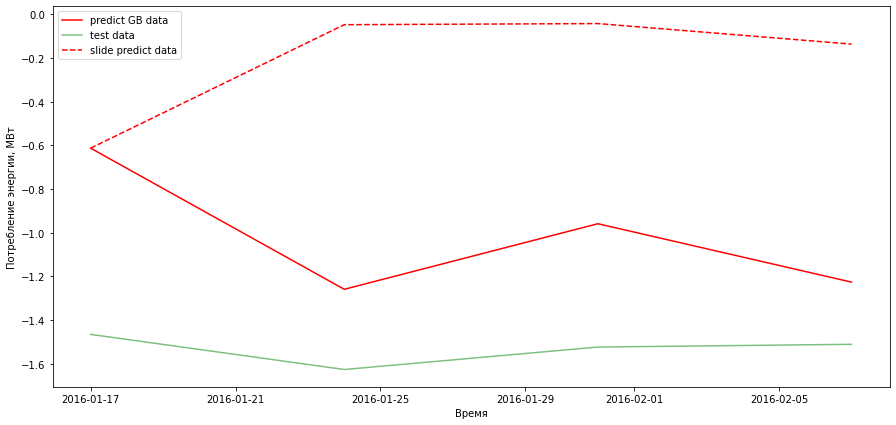

In [422]:
#'PJME_MW', 'month', 'weekofyear', 'diff1_l', 't11', 't10', 't9', 't8'], dtype='object'
#list_par=[0, 2, 4, 7, 16,17,18, 19]
X_test_100 = X_test.copy()
y_test_100 = y_pred.copy()
N10 = 4
for i in range(N10):   
    
    y_test_100[i] = model_ag.predict(X_test_100[i,:].reshape((1,8)))
    #Восстанавливаем не масштабированное значение ряда
    y_i = scl_target.inverse_transform(y_test_100[i:i+1])
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0]/scl_x.scale_[0])
    #X_test_100[i+1,0] = y_test_100[i]
    #X_test_100[i+1,6] = X_test_100[i+1,0]*(1-0.08)+ 0.08 * X_test_100[i,6] 
    #X_test_100[i+1,5] = X_test_100[i+1,0]*(1-0.07)+ 0.07 * X_test_100[i,5] 
    '''
    #Строим d_w4 - признак с индексом 4
    if i>p:
        X_test_100[i+1,4] = np.mean(X_test_100[i+1-p:i+1,0]) '''
    #Строим diff1_l - признак с индексом 3 
    #строим логарифм по значению ряда и скалируем признак по схеме 7го признака из основного списка
    xy_i = (np.log((y_i))-scl_x.mean_[7])*scl_x.scale_[7]
    #новое значение для 3
    X_test_100[i+1,3] = xy_i 
    #X_test_100[i+1,3] = 0 #np.log( scl_target.inverse_transform(y_test_100[i:i+1]))
    # восстанавливаем tn - PJME_MW n недель назад
    X_test_100[i+1,4] = X_test_100[i,5]
    X_test_100[i+1,5] = X_test_100[i,6]
    X_test_100[i+1,6] = X_test_100[i,7]
    # Здесь придется восстанавливать, так как нет t9 в финальном списке
    #_test_100[i+1,7] = scl_x.inverse_transform(X)[i,4]
    
    
    # восстанавливаем weekofyear
    X_test_100[i+1,2] = X_test_100[i,2]
    
     # восстанавливаем month
    X_test_100[i+1,1] = X_test_100[i,1]



plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()  

In [423]:
 X_test_100[i+1,2]

-0.8386181966670743

In [424]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   20.339150070435224 %


5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)

6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда

In [425]:
#'PJME_MW', 'month', 'weekofyear', 'diff1_l', 't11', 't10', 't9', 't8'], dtype='object'
#list_par=[0, 2, 4, 7, 16,17,18, 19]
X_test_100 = X_test.copy()
y_test_100 = y_pred.copy()
N10 = 100
for i in range(N10):   
    
    y_test_100[i] = model_ag.predict(X_test_100[i,:].reshape((1,8)))
    #Восстанавливаем не масштабированное значение ряда
    y_i = scl_target.inverse_transform(y_test_100[i:i+1])
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0]/scl_x.scale_[0])
    #X_test_100[i+1,0] = y_test_100[i]
    #X_test_100[i+1,6] = X_test_100[i+1,0]*(1-0.08)+ 0.08 * X_test_100[i,6] 
    #X_test_100[i+1,5] = X_test_100[i+1,0]*(1-0.07)+ 0.07 * X_test_100[i,5] 
    '''
    #Строим d_w4 - признак с индексом 4
    if i>p:
        X_test_100[i+1,4] = np.mean(X_test_100[i+1-p:i+1,0]) '''
    #Строим diff1_l - признак с индексом 3 
    #строим логарифм по значению ряда и скалируем признак по схеме 7го признака из основного списка
    xy_i = (np.log((y_i))-scl_x.mean_[7])*scl_x.scale_[7]
    #новое значение для 3
    X_test_100[i+1,3] = xy_i 
    #X_test_100[i+1,3] = 0 #np.log( scl_target.inverse_transform(y_test_100[i:i+1]))
    # восстанавливаем tn - PJME_MW n недель назад
    X_test_100[i+1,4] = X_test_100[i,5]
    X_test_100[i+1,5] = X_test_100[i,6]
    X_test_100[i+1,6] = X_test_100[i,7]
    # Здесь придется восстанавливать, так как нет t9 в финальном списке
    #_test_100[i+1,7] = scl_x.inverse_transform(X)[i,4]
    
    
    # восстанавливаем weekofyear
    X_test_100[i+1,2] = X_test_100[i,2]
    
     # восстанавливаем month
    X_test_100[i+1,1] = X_test_100[i,1]

In [428]:
err_mape = []
for i in range(10):
    err_mape.append(mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test[i*10:i*10+10]),y_pred = scl_target.inverse_transform(y_test_100[i*10:i*10+10])))

err_mape

[15.680720535076475,
 9.431599394247279,
 13.730291537521216,
 8.159661254525052,
 9.44990230681733,
 18.171050312385876,
 5.876583309484409,
 8.749488440426617,
 10.712378892164601,
 8.271384486086346]

Не видно закономерности, хотя если бы модель была правильная то скорее ошибка бы нарастала. 